1. Classification

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

digits = datasets.load_digits()

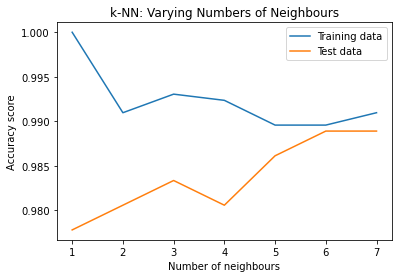

In [2]:
X = digits.data
y = digits.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise the KNN classifier for different k values
k_values = list(range(1, 8))
training_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Plot the accuracy scores for training and test data
plt.plot(k_values, training_scores, label='Training data')
plt.plot(k_values, test_scores, label='Test data')
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy score')
plt.title('k-NN: Varying Numbers of Neighbours')
plt.legend()
plt.show()

K = 6 is the best option, as the difference between training and testing accuracy is the lowest. This will be the most reliable model for classifications in the 'digits' dataset.

In [3]:
# Define the kernels to compare
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Implement SVM classification for different kernels
for kernel in kernels:
    svm = SVC(kernel=kernel, gamma='scale')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # Calculate and compare the accuracy scores and classification reports
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f'Kernel: {kernel}')
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(report)
    print('------------------------------------------------------------')


Kernel: linear
Accuracy: 0.9778
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

------------------------------------------------------------
Kernel: poly
Accuracy: 0.9917
Classification Report:
              precision    recall  f1-score   support

           0     

When using SVM for classification of the 'digits' dataset, the polynomial kernal is most suitable. As seen on the above classification accuracy reports, the overall accuracy of the polynomial kernal is superior to the other options. I believe that the reason for the higher accuracy when compared to a linear kernel is due to the fact that it is classifying handwritten digits. Due to the inaccurate nature of handwriting, a kernel which is able to identify non-linear relationships is best.

In [4]:
# Implement the Naïve Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Calculate the accuracy score and the confusion matrix for Naïve Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
confusion_nb = confusion_matrix(y_test, y_pred_nb)

# Compare the accuracy of different classifiers
classifiers = {
    'Naïve Bayes': GaussianNB(),
    'SVM (poly kernel)': SVC(kernel='poly', gamma='scale'),
    'KNN': KNeighborsClassifier(n_neighbors=3)
}

accuracy_scores = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

# Plot the confusion matrix for Naïve Bayes
plt.matshow(confusion_nb, cmap=plt.cm.Blues)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naïve Bayes')
plt.colorbar()
plt.show()
    
# Plot the accuracy scores
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.ylabel('Accuracy')
plt.title('Classifier')
plt.show()

2. Regression

In [46]:
# Import dependencies
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

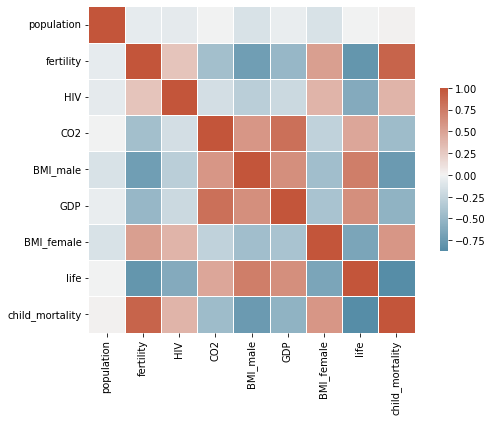

In [47]:
# Import csv data into pandas dataframe and define correlation matrix
df = pd.read_csv('gapminder.csv')
df.dropna(inplace=True)
matrix = df.corr()
# Set up sub-plots
f, ax = plt.subplots(figsize=(9, 6))
# Set up colourmap and heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(matrix, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

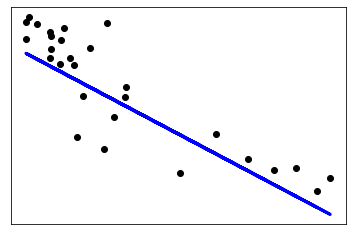

In [48]:
# Define the feature (X) and target (y) variables
X = df[['fertility']]
y = df['life']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a linear regression object and fit it to the training data
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict life expectancy on the test set
y_pred = reg.predict(X_test)

# plt.plot was not working, so using np.ravel to flatten 'X_test' fixed the issue
plt.scatter(np.ravel(X_test), y_test, color='black')
plt.plot(np.ravel(X_test), y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [49]:
# Define the feature (X_all) and target (y) variables. Drop non-number columns
X_all = df.drop(columns=['life', 'Region'])
y = df['life']

# Split the data into training and testing sets
X_all_train, X_all_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Create a linear regression object and fit it to the training data
reg_all = LinearRegression()
reg_all.fit(X_all_train, y_train)

# Predict life expectancy on the test set
y_all_pred = reg_all.predict(X_all_test)

# Calculate and print the R^2 score
r2_all = r2_score(y_test, y_all_pred)
print("R^2 score (all features): ", r2_all)

print("R^2 score (single feature): ", r2_single)

print("Difference in R^2 scores: ", r2_all - r2_single)

R^2 score (all features):  0.9204607131101163
R^2 score (single feature):  -0.9566885965924583
Difference in R^2 scores:  1.8771493097025747


By looking at the R^2 score, it can safely be said that the regression model using all variables against 'life_expectancy' is better suited to predicting life expectancy than using only fertility.

In [50]:
df = pd.read_csv('creditcard.csv')
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(frauds), "frauds, ", len(non_frauds), "nonfrauds.")

492 frauds,  284315 nonfrauds.


In [51]:
plt.scatter(df['Amount'], df['Class'])

My conclusion is that fraudulent transactions are all under the $5000 mark. 

In [55]:
X = df.drop(columns='Class')
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_test['Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1, 1))

reg = LogisticRegression(max_iter=10000)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()